# 01 Android 어플리케이션  1 - 쓰레드와 핸들러
(thread and handler)

## 1) 안드로이드에서의 쓰레드
- 안드로이드 애플리케이션이 처음 시작되면 런타임 시스템에서 하나의 Thread를 생성한다. 모든 애플리케이션 컴포넌트는 기본적으로 그 Thread (main thread) 내에서 실행된다.
- 메인 Thread는 주로 사용자 인터페이스를 처리함. 
- 메인 Thread에서 시간이 오래 걸리는 작업을 수행하는 애플리케이션의 컴포넌트가 있으면 해당 작업이 끝날 때까지 애플리케이션이 멈춘 것처럼 보임. 그래서 메인 Thread에서 시간이 오래 걸리는 작업을 하면 안됨!
- 메인 Thread 이외의 다른 Thread 코드에서는 사용자 인터페이스를 직접 변경할 수 없음
  - 이유는 바로 안드로이드의 UI 툴킷이 Thread에 안전하지 않기 때문
  - 여러 Thread가 동시에 실행되면서 각종 리소스를 공유할 때 생길 수 있는 문제에 대비를 하지 못하기 때문이다하하

- 표준 자바로 지원 
  – Thread 클래스로부터 상속받는 클래스를 생성 후 객체 생성하는 방법
    ```Thread ()```
  - Runnable 인터페이스 구현 객체를 생성 후 Thread의 생성자로 전달하는 방법이 있음.
    - ```Thread (Runnable runnable)```
    - 리턴을 받고자 하면 Callable 인터페이스 구현

<br />

- Thread의 수행 내용
  - void run() 메소드를 재정의해서 작성
- Thread의 시작
  - Thread객체.start()

In [ ]:
# Thread 클래스를 상속

class MyThread extends Thread {
  public void run() {
  }
}
MyThread thread=new MyThread();
thread.start();

In [ ]:
# Runnable 인터페이스를 구현

class MyThread implements Runnable {
  public void run() {
  }
}
MyThread runnable = new MyThread();
Thread thread = new Thread(runnable);
thread.start();

### 쓰레드와 다중 쓰레드 
Thread and Multi Thread
- 한 번에 여러 개의 작업을 동시에 실행할 수 있도록 해주는 것
- Thread 간의 동기화를 고려하여 소프트웨어를 설계해야 하므로 복잡성이 증가한다.
- 안드로이드는 멀티 Thread 지원
  - 기반인 리눅스가 멀티 Thread 운영체제
  - 주 개발 언어인 자바가 가상 머신 차원에서 멀티 Thread 지원
  - 백그라운드 작업에 유리하며 다소 복잡한 구조의 응용 프로그램도 쉽게 개발 가능
  - 안드로이드에서 메인 Thread 이외의 Thread에서는 UI 수정 작업이 불가능. UI 변경은 메인 Thread에서 수행(최근의 API에서는 가능)
  - 메인 Thread에서 주기적인 UI 갱신을 하려고 할 때 **Handler를 이용하지 않으면 모아서 한꺼번에 처리**하려고 하는데 이게 **오류를 발생**시킬 수 있음.

## 2) 핸들러 
Handler
- Thread 간에 메시지나 Runnable 객체를 통해 메시지를 주고 받는 장치
- 추상 클래스로 제공
- 매개변수가 없는 생성자는 deprecated 되었으며 Looper를 대입하는 생성자로 인스턴스를 생성하는 것을 권장
- 하나의 Thread와 관련을 맺으며 자신을 생성하는 Thread에 부착해서 그 Thread의 메시지 큐를 통해 다른 Thread와 통신

- 안드로이드에서 화면을 갱신하는 코드를 메인 Thread 이외의 클래스의 run 메소드에 직접 기재하면 에러가 발생한다. Handler 객체에게 메시지를 전달 한 후 작업을 수행해야 한다. 
- 메시지 전송
  - 메시지를 보내는 쪽에서 전달하고자 하는 내용을 Message 객체에 저장하여 Handler로 전송 시 이용하는 메소드
    - ```sendMessage(Message msg)```: Main(UI) Thread에 의뢰
    - ```sendMessageAtFrontOfQueue(Message msg)```: 이번 의뢰를 가장 먼저 처리
    - ```sendMessageAtTime(Message msg, long uptimeMillis)```: 지정된 시간에 수행해 달
라는 요청
    - ```sendMessageDelayed(Message msg, long delayMillis)```: 의뢰를 바로 처리하지 말
고 지정 시간 후에 수행해 달라는 요청
    - ```sendEmptyMessage(int what)```: 데이터 전달 없이 의뢰하는 경우
  - 메시지를 보내면 Handler의 handleMessage 메소드가 호출되며 이 메소드에 전달된 메시지의 의미를 파악하여 신호나 명령에 응답함.
- Message 객체는 디폴트 생성자로 생성한 후 필드의 값을 채워도 되고 obtain이라는 팩토리 메소드를 이용하는 것도 가능

Message
- 스레드가 핸들러에게 데이터를 전달하기 위한 객체
- 특징:
  - ```int what```: 스레드를 구분하기 위한 코드로 주로 이용
  - ```int arg1```: 부가 정보
  - ```int arg2```: 부가 정보
  - ```Object obj```: 부가 정보 – 데이터는 보통 여기에 저장
  - ```Messenger replyTo```

```post``` 요청
- UI를 변경하는 코드는 Handler 객체의 post 메소드에게 Thread 객체를 생성해서 넘겨도 가능
- 일정시간 Delayed 시켜주는 postDelayed 메소드도 존재
- post와 send의 차이점
  - ```send```는 바로 처리해야 하는 요청
  - ```post``` 다른 요청이 없으면 처리해달라는 요청

작업 스케줄링
ü지연 시간
q실제 필요한 시간은 CPU의 성능이나 click 아래쪽의 코드 존재 여부에 따라 달라짐
qclick이 리턴할 정도의 시간이면 충분함
ü View 클래스의 메소드를 사용하여 러너블 전송
qView가 속한 Thread의 큐를 찾아 러너블을 전송하므로 Handler가 없어도 상관 없음
qpost : 지연 시간없이 러너블을 큐에 삽입
qpostDelayed : 지연 시간을 두고 삽입
q러너블 삽입 성공 시 true를 리턴하며 실패 시 false를 리턴
o true가 리턴되어도 러너블이 실행된 것은 아님

작업 스케줄링
- 지연 시간
  - 실제 필요한 시간은 CPU의 성능이나 click 아래쪽의 코드 존재 여부에 따라 달라짐
  - click이 리턴할 정도의 시간이면 충분함
- View 클래스의 메소드를 사용하여 러너블 전송
  - View가 속한 Thread의 큐를 찾아 러너블을 전송하므로 Handler가 없어도 무관
        boolean post (Runnable action)
        boolean postDelayed (Runnable action, long delayMillis)
  - post : 지연 시간없이 러너블을 큐에 삽입
  - postDelayed : 지연 시간을 두고 삽입
  - 러너블 삽입 성공 시 true를 리턴하며 실패 시 false를 리턴
    - ```true```가 리턴되어도 러너블이 실행된 것은 아님

In [ ]:
# activity_main.xml 

<?xml version="1.0" encoding="utf-8"?>
<androidx.constraintlayout.widget.ConstraintLayout xmlns:android="http://schemas.android.com/apk/res/android"
    xmlns:app="http://schemas.android.com/apk/res-auto"
    xmlns:tools="http://schemas.android.com/tools"
    android:layout_width="match_parent"
    android:layout_height="match_parent"
    android:orientation="vertical"
    tools:context=".MainActivity">

    <TextView
        android:layout_width="match_parent"
        android:layout_height="wrap_content"
        android:text="My second android project...!"
        android:id="@+id/txt"
        app:layout_constraintBottom_toBottomOf="parent"
        app:layout_constraintLeft_toLeftOf="parent"
        app:layout_constraintRight_toRightOf="parent"
        app:layout_constraintTop_toTopOf="parent" />

    <Button
        android:layout_width="match_parent"
        android:layout_height="wrap_content"
        android:text="start"
        android:id="@+id/btn" />

</androidx.constraintlayout.widget.ConstraintLayout>

In [ ]:
# MainActivity.java

public class MainActivity extends AppCompatActivity {

    TextView txt;
    Button btn;

    // index variable
    int value;

    // Create an handler - this is an instance of a class that inherits from Handler class.
    // This is called 'Anonymous Class' in java.
    Handler handler = new Handler(Looper.getMainLooper()){
        @Override
        public void handleMessage(Message msg){
            txt.setText(value + "");
        }
    };

    class ValueThread extends Thread {
        public void run(){
            try{
                for(int i=0; i<10; i=i+1){
                    value = value + 1;
                    // Sleep for 1 second.
                    Thread.sleep(1000);
                    // Sends message to Handler to handle the task.
                    handler.sendEmptyMessage(0);
                }
            } catch(Exception e){}
        }
    }

    @Override
    protected void onCreate(Bundle savedInstanceState) {
        super.onCreate(savedInstanceState);
        setContentView(R.layout.activity_main);

        txt = (TextView)findViewById(R.id.txt);
        btn = (Button)findViewById(R.id.btn);

        btn.setOnClickListener(new View.OnClickListener() {

            @Override
            public void onClick(View view){
                ValueThread th = new ValueThread();
                th.start();
            }

        });
    }
}

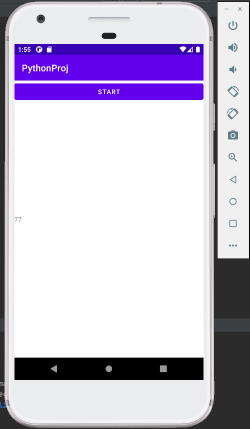

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

path = "/content/MainActivity.png"
img = cv2.imread(path)
img = cv2.resize(img, dsize=(0,0), fx=0.5, fy=0.5)
cv2_imshow(img)

Looper

- MessageQueue를 감시하고 있다가 필요한 경우 메시지를 추출하고 추출한 메시지를 Handler의 handleMessage 메소드를 호출해서 전달하는 전달자
- 안드로이드 애플리케이션에는 내부적으로 1개의 Looper 할당
- UI 갱신은 Looper를 직접 생성하지 않고 처음부터 제공되는 ```Looper – Looper.getMainLooper()```를 이용
- 개발자가 만든 Thread끼리의 통신은 직접 Looper를 생성해야 함